In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df =  pd.read_csv('games.csv')



In [20]:
df.columns


Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [21]:
df.isnull().sum()


id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Text(0.5, 1.0, 'Winner vs Count')

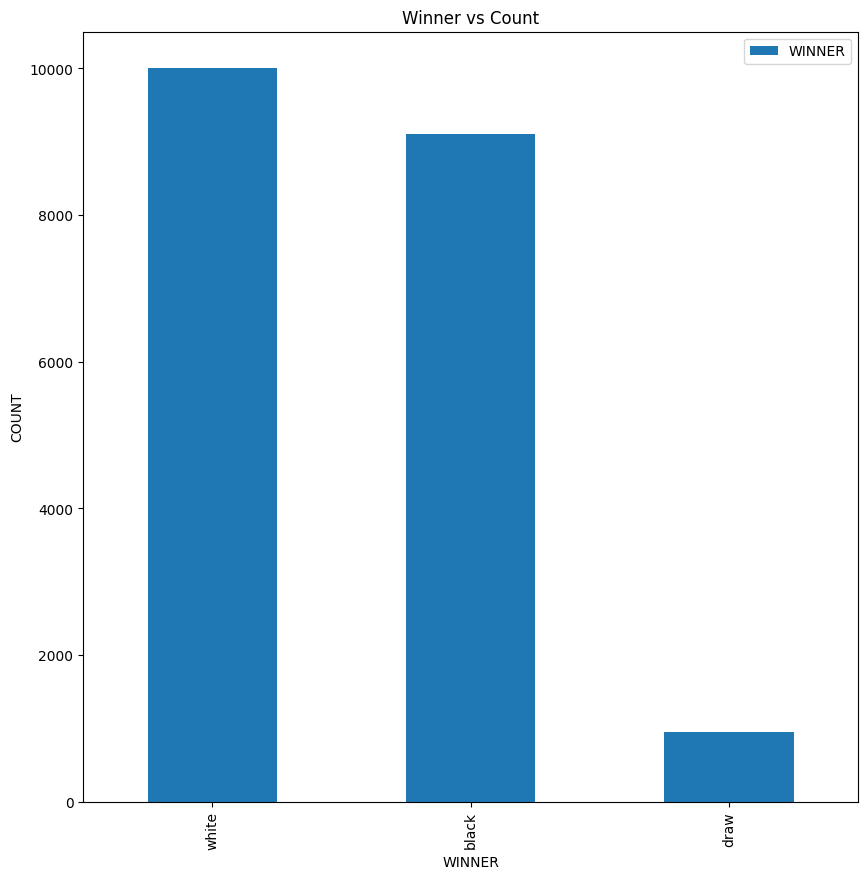

In [22]:
plt.figure(figsize=(10,10))
x = df.winner.value_counts()[:50].plot(kind='bar')
x.legend(['WINNER'])
plt.xlabel('WINNER')
plt.ylabel('COUNT')
plt.title('Winner vs Count')

Text(0.5, 1.0, 'VICTORY STATUS vs Count')

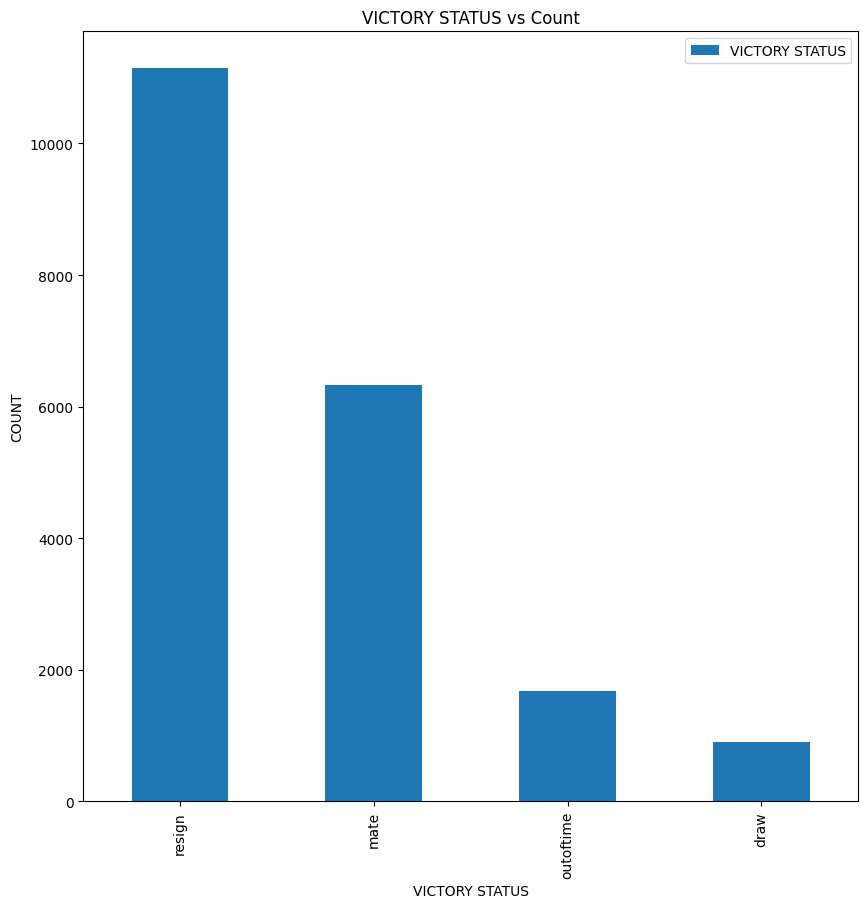

In [23]:
plt.figure(figsize=(10,10))
x = df.victory_status.value_counts()[:50].plot(kind='bar')
x.legend(['VICTORY STATUS'])
plt.xlabel('VICTORY STATUS')
plt.ylabel('COUNT')
plt.title('VICTORY STATUS vs Count')


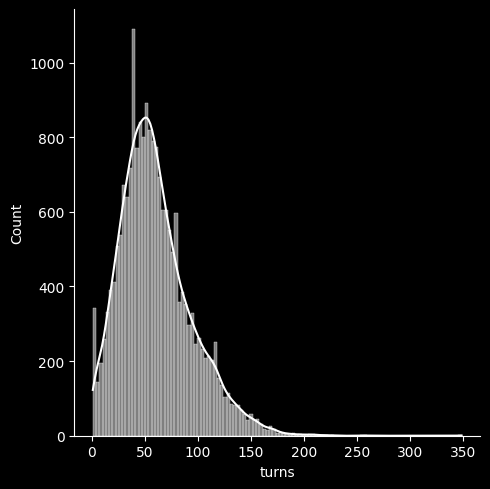

In [24]:
plt.style.use('dark_background')
sns.displot(df.turns,color='white',kde=True)
plt.show()

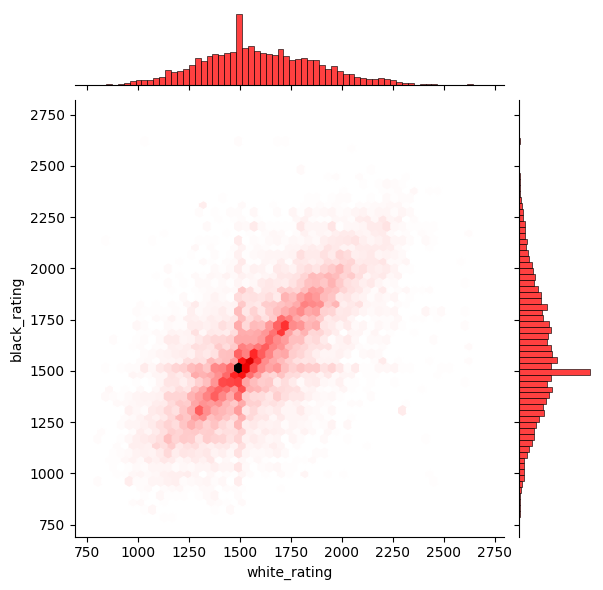

In [25]:
plt.style.use('default')
sns.jointplot(x='white_rating',y='black_rating',data=df,kind='hex',color='red')

<Axes: xlabel='winner', ylabel='turns'>

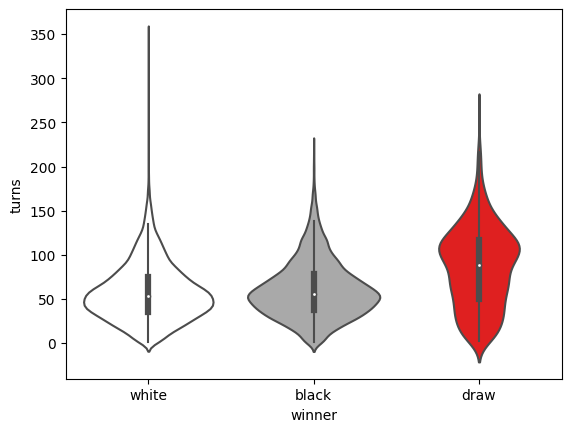

In [26]:
plt.style.use('default')
colors = ["white", "darkgrey","red"]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.violinplot(x="winner", y="turns", data=df,palette=customPalette)

<Axes: xlabel='black_rating', ylabel='turns'>

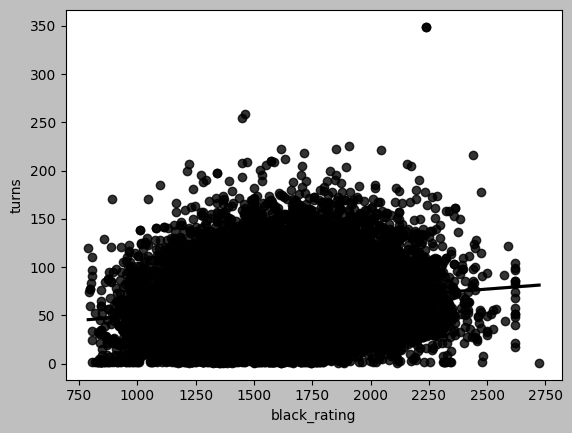

In [27]:
plt.style.use('grayscale')
sns.regplot(x='black_rating',y='turns',data=df,color='black')



<Axes: xlabel='rated', ylabel='count'>

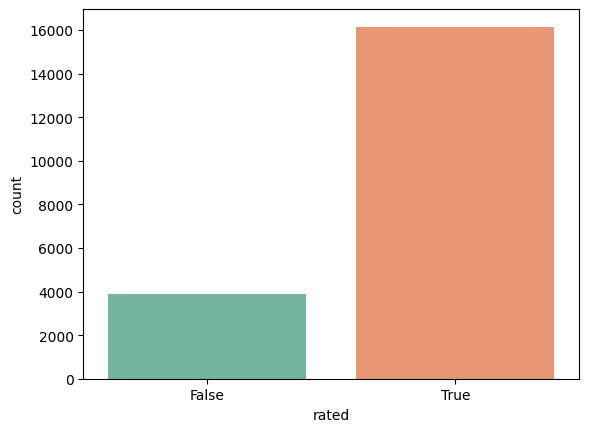

In [28]:
plt.style.use('default')
sns.countplot(x='rated',data=df,palette='Set2')


<Axes: xlabel='count', ylabel='black_id'>

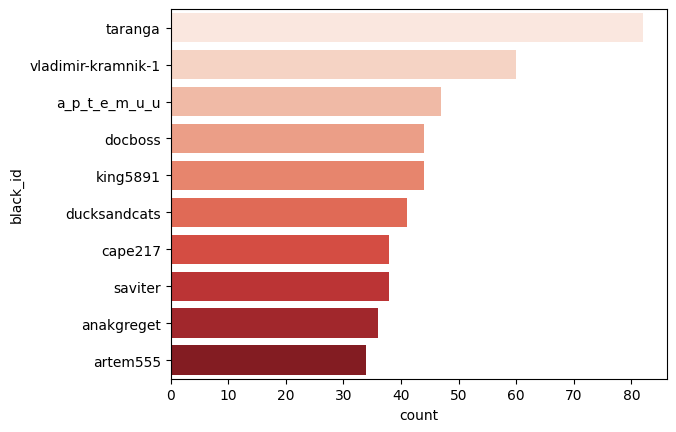

In [29]:
sns.countplot(y="black_id",data=df,palette="Reds",order=df.black_id.value_counts().iloc()[:10].index)

<Axes: xlabel='count', ylabel='opening_name'>

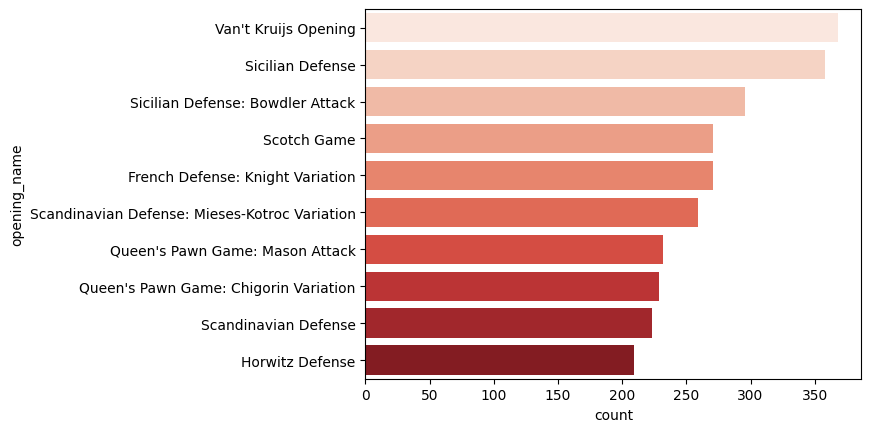

In [42]:
plt.style.use('default')
plt.Figure(figsize=(100,100))
# opening name and counts
sns.countplot(y="opening_name",data=df,palette="Reds",order=df.opening_name.value_counts().iloc()[:10].index)



In [43]:
df.victory_status.value_counts()

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64

In [44]:
df = df[df.rated]
df['mean_rating'] = (df['white_rating'] + df['black_rating'])/2
df['rating_diff'] = df['white_rating'] - df['black_rating']

C:\Users\refoc\AppData\Local\Temp\ipykernel_3544\2966776275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_rating'] = (df['white_rating'] + df['black_rating'])/2
C:\Users\refoc\AppData\Local\Temp\ipykernel_3544\2966776275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_diff'] = df['white_rating'] - df['black_rating']


In [45]:
under_1500 = df[df.mean_rating < 1500]
under_2000 = df[df.mean_rating < 2000]
over_2000 = df[df.mean_rating > 2000]

brackets = [under_1500, under_2000, over_2000]
bracket_titles = ['Under 1500', 'Under 2000', 'Over 2000']

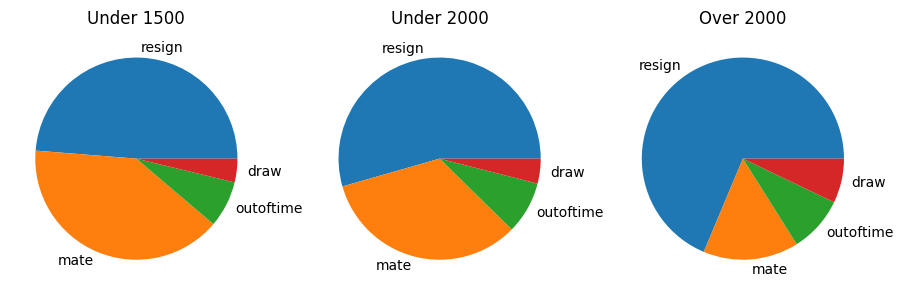

In [46]:
plt.figure(figsize=(15,11))
for i, bracket in enumerate(brackets):
    victory_status = bracket.victory_status.value_counts()
    plt.subplot(1, 4, i+1)
    plt.title(bracket_titles[i])
    plt.pie(victory_status, labels=victory_status.index)
plt.show()

In [47]:
mate_games = df[df.victory_status == 'mate']
under_1500 = mate_games[mate_games.mean_rating < 1500]
under_2000 = mate_games[mate_games.mean_rating < 2000]
over_2000 = mate_games[mate_games.mean_rating > 2000]
m_brackets = [under_1500, under_2000, over_2000]

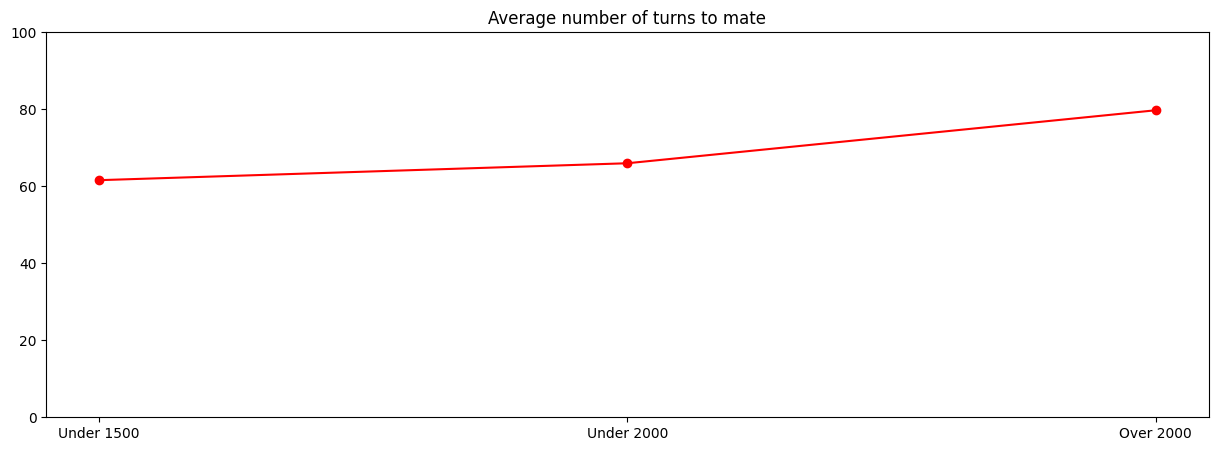

In [51]:
turn_mean = [b.turns.mean() for b in m_brackets]
plt.figure(figsize=(15,5))
plt.ylim(0, 100)
plt.title('Average number of turns to mate')
plt.plot(bracket_titles, turn_mean, marker='o',color='red')

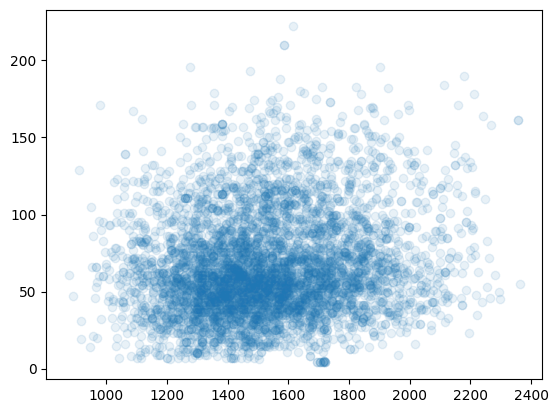

In [52]:
plt.Figure(figsize=(100,100))
plt.scatter(mate_games.mean_rating, mate_games.turns, alpha=0.1)

In [53]:
white_upsets = df[(df.winner == 'white') & (df.white_rating < df.black_rating)]
black_upsets = df[(df.winner == 'black') & (df.white_rating > df.black_rating)]
upsets = pd.concat([white_upsets, black_upsets])

In [54]:
THRESHOLD = 900
STEP = 50
u_percentages = []

print('Percentage of upsets by rating difference:')
for i in range(0+STEP,THRESHOLD,STEP):
    th_upsets = upsets[upsets.rating_diff > i]
    th_games = df[df.rating_diff > i]
    upsets_percentage = (th_upsets.shape[0] / th_games.shape[0]) * 100
    u_percentages.append(upsets_percentage)
    print(f'{i} - {upsets_percentage}%')

Percentage of upsets by rating difference:
50 - 26.918475474277905%
100 - 23.03529411764706%
150 - 19.750320102432777%
200 - 16.37706342311034%
250 - 14.790807307012374%
300 - 12.693246541903989%
350 - 10.143329658213892%
400 - 8.708708708708707%
450 - 9.18803418803419%
500 - 9.195402298850574%
550 - 9.50413223140496%
600 - 9.375%
650 - 8.49056603773585%
700 - 5.128205128205128%
750 - 4.444444444444445%
800 - 0.0%
850 - 0.0%


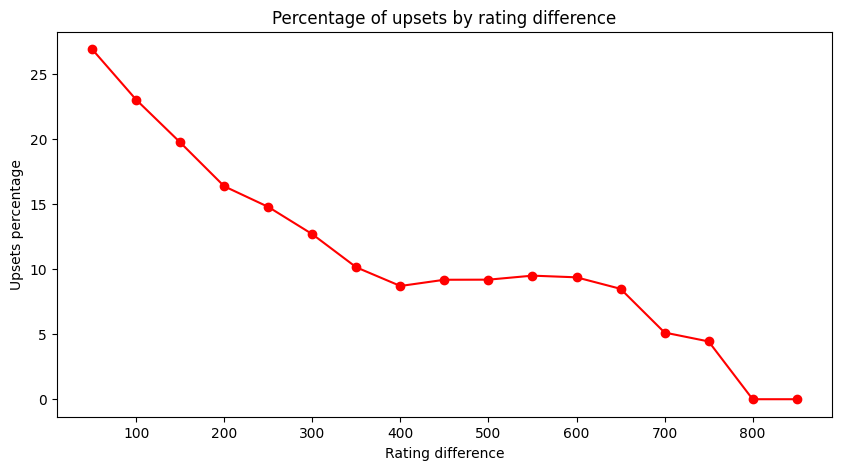

In [56]:
plt.figure(figsize=(10,5))
plt.title('Percentage of upsets by rating difference')
plt.xlabel('Rating difference')
plt.ylabel('Upsets percentage')
plt.plot(range(0+STEP,THRESHOLD,STEP), u_percentages, marker='o',color='red')